In [1]:
import os
import warnings
import pickle as pkl
import pathlib
import string

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker
from matplotlib.legend import Legend

In [2]:
def produce_scaling(X, scaling_exp, Y0, x_bounds,):
    x = X[x_bounds[0]:x_bounds[1]]
    return x, Y0 * x**scaling_exp / x[0]**scaling_exp

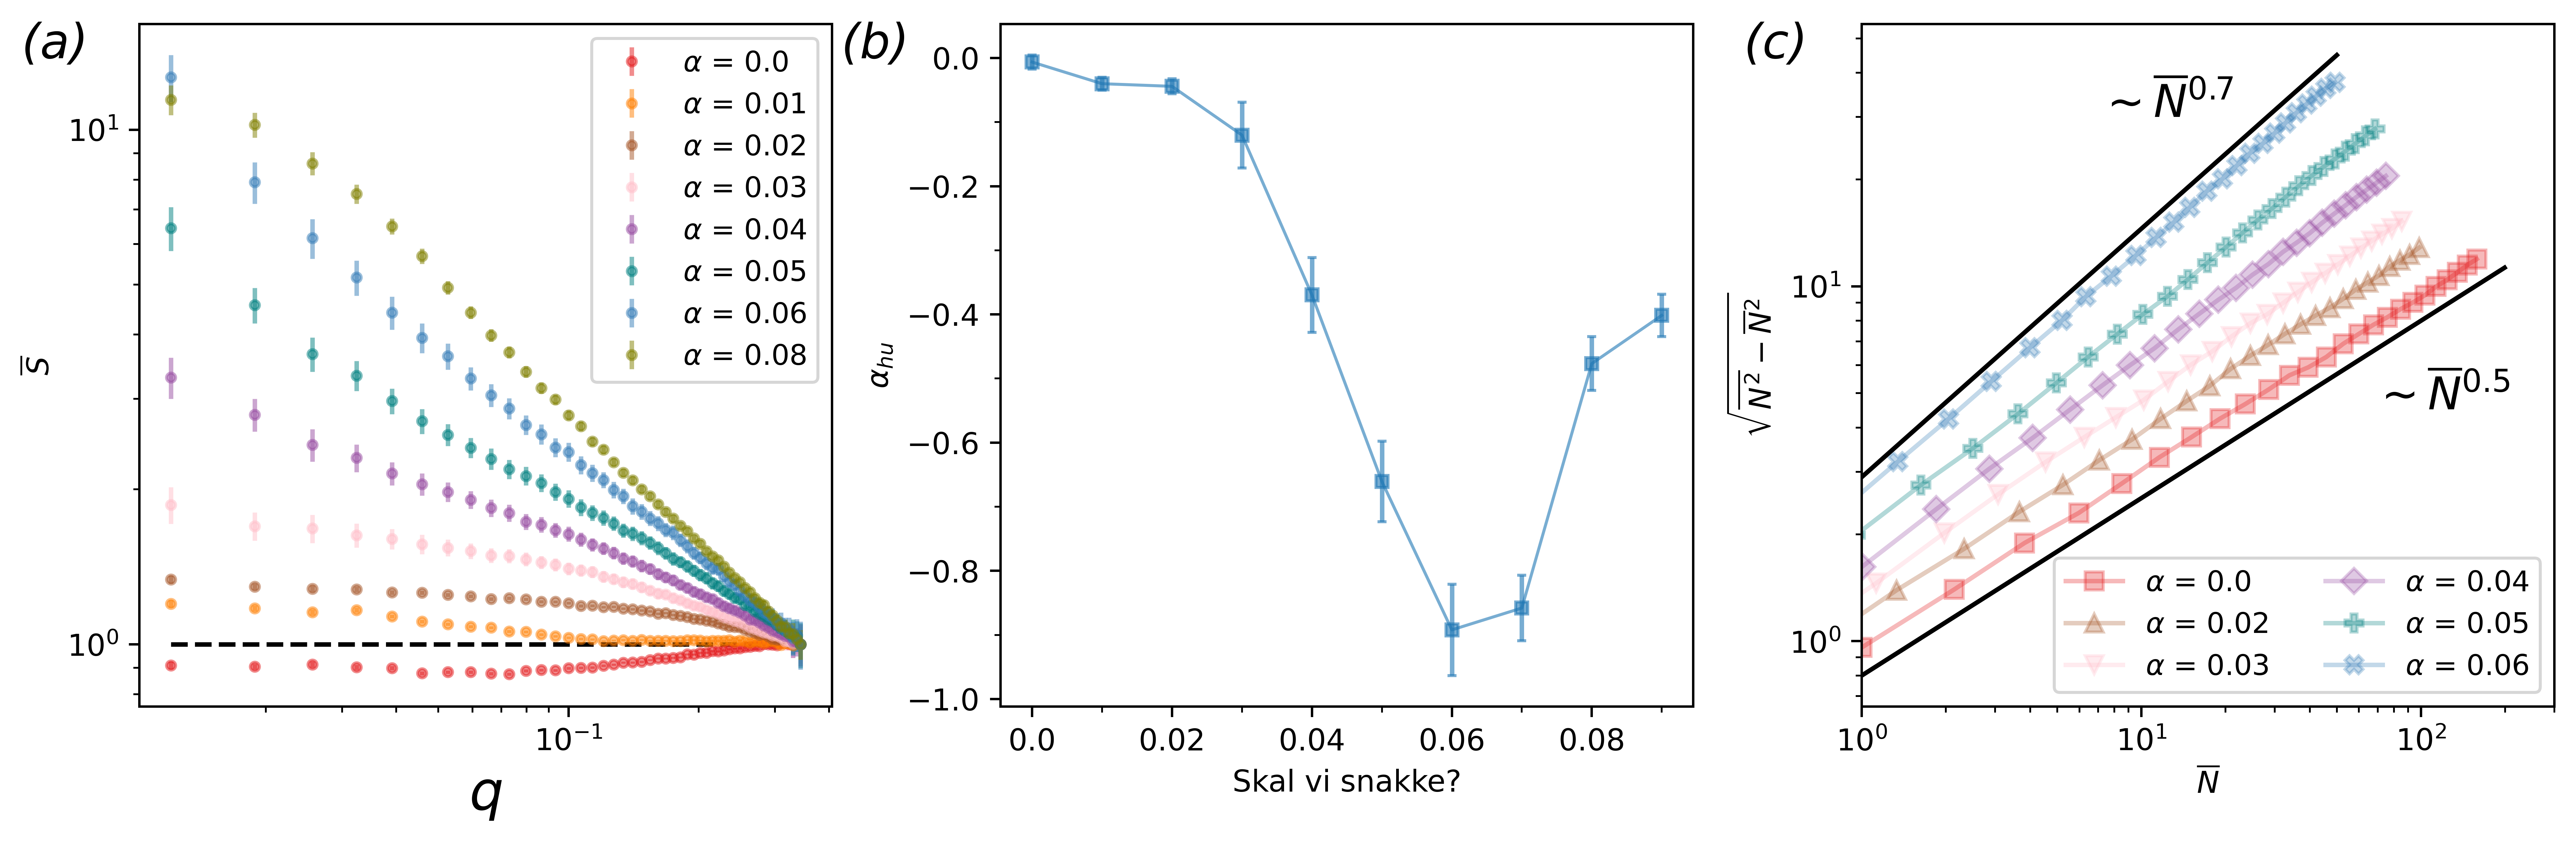

In [4]:

data_path = os.path.join('data\\na_ndg\\data.npz') # add path here
data = np.load(data_path, allow_pickle=True)
kbins, sfac_av, alpha_list, av_counts_non, var_counts_non, fit_params = \
                    data['kbins'], data['sfac_av'], data['alpha_list'], \
                    data['av_counts_non'], data['var_counts_non'], data['fit_params']

normalize=True
colors=['#E41A1C', '#FF7F00', '#A65628', '#FFC0CB', '#984EA3', 'teal','#377EB8', 'black','olive']
marker_shape = ['s-', 'o-', '^-', 'v-', 'D-', 'P-', 'X-', 'h-', 'd-', 'p-', 'H-', '8-', '1-', '2-']

plt.rcParams['text.usetex'] = False
fig, ax0 = plt.subplots(nrows = 1, ncols = 3, figsize=(12,4)) 
ax0 = ax0.flatten()
axxs = ax0[0]
ax = ax0[1]
axx = ax0[-1]

# make left plot
for i, alpha in enumerate(alpha_list):	
    if alpha in [0.07, 0.09]:
        continue
    alpha_idx = np.where(alpha_list==alpha)[0][0]
    normalizer = sfac_av[i,-1,0] if normalize else 1
    axxs.errorbar(kbins,  sfac_av[i,:,0]/normalizer, 
                yerr = sfac_av[i,:,1]/normalizer, fmt = 'o', alpha = .5, 
                color = f'{colors[alpha_idx]}', markersize = 3
                , label = rf'$\alpha$ = {alpha}')
    
axxs.set_xscale('log')
axxs.set_yscale('log')
axxs.legend(fontsize=9.5,ncols=1) 
axxs.set_xlabel(r'$q$', fontsize=18)
axxs.set_ylabel(r'$\overline{S}$');
axxs.hlines(1, kbins[0], kbins[-1], linestyles='dashed', colors='k', lw=1.5)

# make middle plot
ax.errorbar(alpha_list, fit_params[:,0], fit_params[:,2], fmt = 's-',
                alpha = .6, elinewidth=1.5, capsize=1.5, 
                capthick=1, markersize = 4, lw=1, color = f'C{0}')
ax.set_xticks(alpha_list[::2], alpha_list[::2])
ax.set_xlabel('Skal vi snakke?') #r'$\alpha$')
ax.set_ylabel(r'$\alpha_{hu}$')

ax.yaxis.set_minor_locator(ticker.MultipleLocator(.1))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(1e-2))

# make right plot
for i, alpha in enumerate(alpha_list):
    
  if alpha in [.01, .07, .08, .09]:
    continue
  alpha_idx = np.where(alpha_list==alpha)[0][0]

  axx.plot(av_counts_non[i,:,0], np.sqrt(var_counts_non[i,:,0]), 
              marker=marker_shape[i][:1], alpha=.3, color = f'{colors[alpha_idx]}', label = rf'$\alpha$ = {alpha}')

# plot lines
x = np.arange(1,2e2)
X5, Y5 = produce_scaling(x, 0.5, .8, [0,None])
X7, Y7 = produce_scaling(x, 0.7, 2.9, [0,50])
axx.plot(X5, Y5, 'k-', lw=1.5) #label = r'$\sim N^{0.5}$')
axx.plot(X7, Y7, 'k-', lw=1.5)#label = r'$\sim N^{0.6}$')
axx.text(67,4.5, r'$\sim \overline{N}^{0.5}$', fontsize=15)
axx.text(7,30, r'$\sim \overline{N}^{0.7}$', fontsize=15)

axx.set_xlabel(r'$\overline{N}$')
axx.set_ylabel(r'$\sqrt{\overline{N^2} - \overline{N}^2}$')
axx.set_xscale('log')    
axx.set_yscale('log')
axx.legend(fontsize=9.5,ncol=2, loc='lower right')
axx.set_xlim(1,3e2)  

for n, AXX in enumerate(ax0):
    AXX.text(-.23 if n==1 else-0.17, .95
             , f'({string.ascii_lowercase[n]})', transform=AXX.transAxes,
            size=16,style='italic')

fig.dpi = 720
fig.tight_layout()